In [2]:
from yahoo_finance_api2 import share
from datetime import datetime
import pandas as pd

%matplotlib inline

# Pipeline

1. Clustering
2. LightGBM
3. RNN

# Helpers

In [3]:
def format_unix_time(timestamp):
    """
    Retorna yyyy-mm-dd a partir de um unix timestamp
    """
    return datetime.date(datetime.fromtimestamp(timestamp))

# Historico de componentes do nasdaq-100

In [4]:
nasdaq_100 = ["ATVI","ADBE","AMD","ALXN","ALGN","GOOGL","GOOG","AMZN","AAL","AMGN","ADI","AAPL","AMAT","ASML","ADSK","ADP","BIDU","BIIB","BMRN","BKNG","AVGO","CSX","CDNS","CELG","CERN","CHTR","CHKP","CTAS","CSCO","CTXS","CTSH","CMCSA","COST","CTRP","DLTR","EBAY","EA","EXPE","FB","FAST","FISV","FOXA","FOX","GILD","HAS","HSIC","IDXX","ILMN","INCY","INTC","INTU","ISRG","JBHT","JD","KLAC","KHC","LRCX","LBTYA","LBTYK","LULU","MAR","MXIM","MELI","MCHP","MU","MSFT","MDLZ","MNST","MYL","NTAP","NTES","NFLX","NVDA","NXPI","ORLY","PCAR","PAYX","PYPL","PEP","QCOM","REGN","ROST","SIRI","SWKS","SBUX","SYMC","SNPS","TMUS","TTWO","TSLA","TXN","ULTA","UAL","VRSN","VRSK","VRTX","WBA","WDC","WLTW","WDAY","WYNN","XEL","XLNX"]

In [5]:
def get_ticker_history(ticker):
    """
    Returns ticker history for the past 5 years
    """
    return share.Share(ticker).get_historical(share.PERIOD_TYPE_YEAR,
                                              5,
                                              share.FREQUENCY_TYPE_DAY,
                                              1)

def get_tickers_history(tickers):
    """
    Returns ticker histories for many tickers
    """
    df = pd.DataFrame(get_ticker_history(tickers[0])).assign(ticker=tickers[0])
    for i in range(1, len(tickers)):
        ticker = tickers[i]
        ticker_history = get_ticker_history(ticker)
        nth_df = pd.DataFrame(ticker_history).assign(ticker=ticker)
        df = pd.concat([df, nth_df], axis=0, sort=False)
    return df

In [6]:
df = get_tickers_history(nasdaq_100)

In [7]:
df["timestamp"] = pd.to_datetime(df["timestamp"].apply(lambda row: format_unix_time(row/1000)))

# Apple e AMD

In [ ]:
import seaborn as sns

ticker
AAPL    AxesSubplot(0.125,0.2;0.775x0.68)
AMD     AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

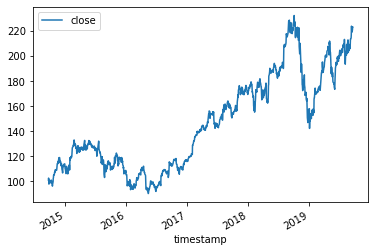

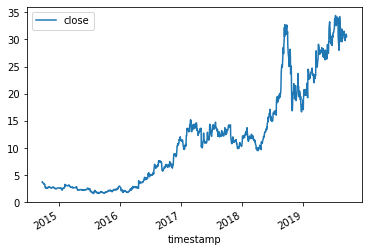

In [12]:
df[df["ticker"].isin(["AAPL", "AMD"])].groupby("ticker").plot(x="timestamp", y="close")

In [13]:
df[df["ticker"].isin(["AAPL", "AMD"])].to_csv("aapl_amd.csv")

In [98]:
df[df["ticker"] == "AAPL"].to_csv("aapl.csv")

# Todos 

In [12]:
df.to_csv("nasdaq_100.csv")

In [16]:
aapl_df = df[df["ticker"] == "AAPL"]

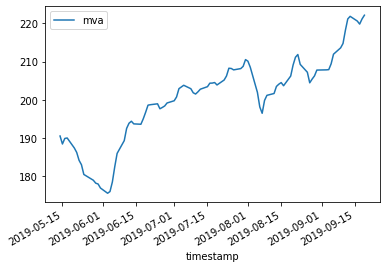

In [34]:
aapl_df.assign(mva=aapl_df["close"].rolling(3).mean()).tail(90).plot(x="timestamp", y="mva")

In [118]:
aapl_df.shape

(1258, 7)

In [54]:
p = Prophet(daily_seasonality=True)
p.fit(aapl_df.assign(ds=aapl_df["timestamp"], y=aapl_df["close"]))

In [59]:
forecast = p.predict(p.make_future_dataframe(periods=10)).tail()